<a href="https://colab.research.google.com/github/Clem-Jos/ULB_MM_2021/blob/main/P_II_Metabolic_Modelling_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TD PART I:** ##
Answer the following question with Escher application:

## **TD PART II :**
STUDY OF THE STRUCTURE OF A GENOME SCALE METABOLIC MODEL

From the given function and the information you got about the cobra language,
try to answer the following questions.

files: functions.txt, metabolic_models.pptx

model : study_model.xml

model2 : *you can chose*

For a better understanding, you can also open the file functions.py to see how some function are built.
During this tutorial you will use object oriented-language.

#Part A

**0-Installation**:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install cobra[all]

     |████████████████████████████████| 2.4 MB 4.0 MB/s 
     |████████████████████████████████| 83 kB 1.7 MB/s 
     |████████████████████████████████| 214 kB 48.5 MB/s 
     |████████████████████████████████| 147 kB 49.0 MB/s 
     |████████████████████████████████| 6.2 MB 31.0 MB/s 
     |████████████████████████████████| 109 kB 50.2 MB/s 
     |████████████████████████████████| 2.1 MB 19.3 MB/s 
     |████████████████████████████████| 10.1 MB 24.1 MB/s 
     |████████████████████████████████| 44 kB 2.4 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 51 kB 6.3 MB/s 
     |████████████████████████████████| 546 kB 41.7 MB/s 


Import the functions.py and the future model file in your directory shown on you left pannel.

**1- Load needed module from functions import:**

In [ ]:
from functions import * 

**2- Load the study_model**

In [ ]:
model = io.read_sbml_model('study_model.xml')

**3- How many metabolites?**

In [ ]:
print('Number of metabolites: ',len(model.metabolites))

Number of metabolites:  7


**4- How many reactions?**

In [ ]:
print('Number of reactions: ',len(model.reactions))

Number of reactions:  10


**5- How many genes**

In [ ]:
print('Number of genes: ',len(model.genes))

Number of genes:  7


**6- Which compartments?**

In [ ]:
print('Model compartments: ',model.compartments)

Model compartments:  {'c': 'cytosol', 'e': 'extracellular'}


**7- Print the stoichiometric matrix**

In [ ]:
matrix = stoicMatrix(model)
print('\n Stoechiometric matrix : \n',matrix)


 Stoechiometric matrix : 
       Tpr_s1  Tpr_s2  Tpr_p1  Ex_s1_e  Ex_s2_e  Ex_p1_e  Rxn_1  Rxn_2  Rxn_3  biomass
s1_c     1.0     0.0     0.0      0.0      0.0      0.0   -1.0   -1.0    0.0     -1.0
s1_e    -1.0     0.0     0.0     -1.0      0.0      0.0    0.0    0.0    0.0      0.0
s2_c     0.0     1.0     0.0      0.0      0.0      0.0    0.0   -1.0   -1.0      0.0
s2_e     0.0    -1.0     0.0      0.0     -1.0      0.0    0.0    0.0    0.0      0.0
p1_c     0.0     0.0     1.0      0.0      0.0      0.0    1.0    2.0    1.0     -0.5
p1_e     0.0     0.0    -1.0      0.0      0.0     -1.0    0.0    0.0    0.0      0.0
m1_c     0.0     0.0     0.0      0.0      0.0      0.0   -1.0    0.0    1.0      0.0


**8- From the stoichiometric matrix, draw the model**

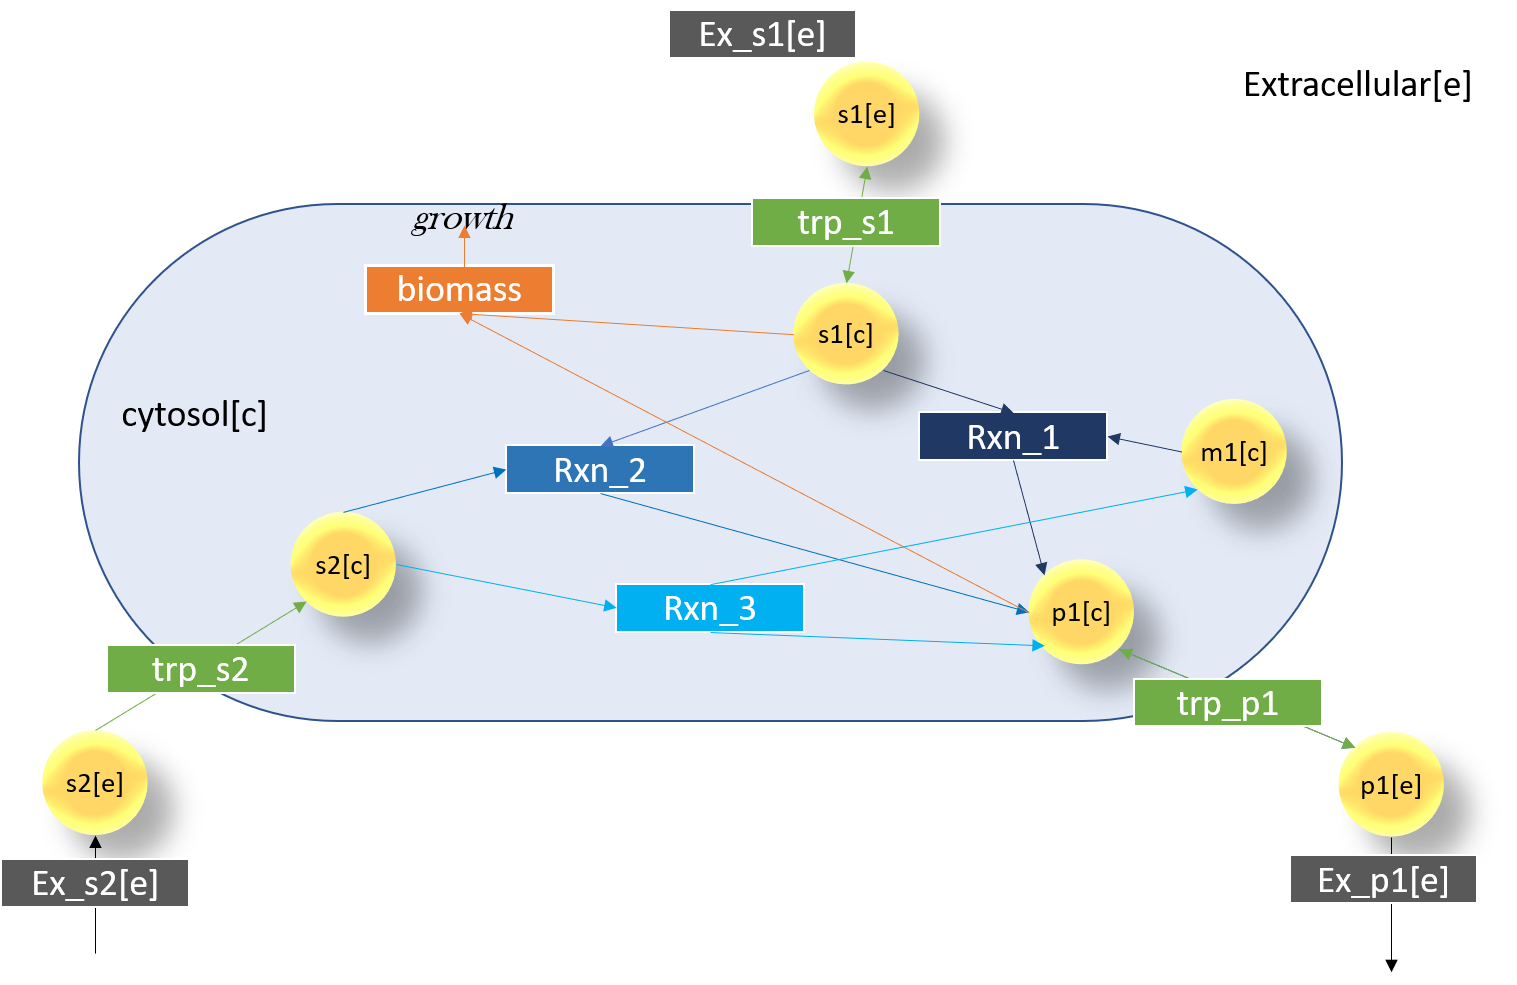

**9- Identify the external, transport, sink, demand, biomass reactions manually and via a command line.**

In [ ]:
print('Demands : ',model.demands)
print('Exchanges',model.exchanges)
print('Sinks',model.sinks)
print('\nReaction types : \n',reactionsType(model))


Demands :  []
Exchanges [<Reaction Ex_s1_e at 0x7f4d252e4d50>, <Reaction Ex_s2_e at 0x7f4d0d5047d0>, <Reaction Ex_p1_e at 0x7f4d0c109550>]
Sinks []

Reaction types : 
 ['trans', 'trans', 'trans', 'exch', 'exch', 'exch', 'metabolic', 'metabolic', 'metabolic', 'biomass']


**10- Select a reaction. Print information about it. It is a reversible reaction? Print bounds of the reaction.**

In [ ]:
rxn = model.reactions.Rxn_1
print('\nId : %s\nname :%s\nReactionformula : %s\nGenes :%s' %(rxn.id,rxn.name,rxn.reaction,''.join((i.id for i in rxn.genes))))
print('Reversibility : %s' %(rxn.reversibility))
print(rxn.lower_bound, "< Reaction flux value < ",rxn.upper_bound)



Id : Rxn_1
name :Reaction_metabolique_1
Reactionformula : m1_c + s1_c --> p1_c
Genes :G00004G00005
Reversibility : False
0.0 < Reaction flux value <  1000.0


**11- Print a metabolite formula, name. Print reactions which involve specific metabolite (and if possible the reaction associated).**

In [ ]:
met = model.metabolites.s1_c 
print('\nMetabolite : %s\nName :  %s\nFormula : %s\nCharge : %i\nCompartment : %s' % (met.id,met.name,met.formula,met.charge,model.compartments[met.compartment]))
print('Involved in reactions : \n%s' %('\n'.join(getRxnsFromMet(model,met))))



Metabolite : s1_c
Name :  substrat1
Formula : C1
Charge : 0
Compartment : cytosol
Involved in reactions : 
Tpr_s1
Rxn_1
Rxn_2
biomass


**12- What is the objective function? Can you show the objective coefficient for each reactions?**

In [ ]:
print('\nObjective function : ', model.objective)
print('\nObjective coefficient:')
for rxn in model.reactions:
    print('%s ->  %i' %(rxn.id,rxn.objective_coefficient))



Objective function :  Maximize
1.0*biomass - 1.0*biomass_reverse_01e59

Objective coefficient:
Tpr_s1 ->  0
Tpr_s2 ->  0
Tpr_p1 ->  0
Ex_s1_e ->  0
Ex_s2_e ->  0
Ex_p1_e ->  0
Rxn_1 ->  0
Rxn_2 ->  0
Rxn_3 ->  0
biomass ->  1


#Part B: Answer the same question with a model of your taste on Bigg Models
Restart the same functions with another model from http://bigg.ucsd.edu/models that you import with the same name 
(Don't try the question 8 you will not make it in time!)